Optimal Production: x1 = 11.11, x2 = 4.44
Maximum Profit: 415.56 million yen


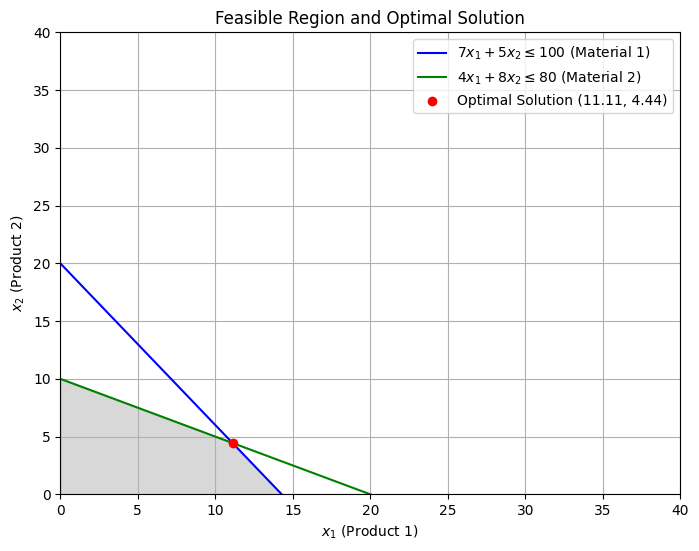

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the objective function (maximize profit -> minimize negative profit)
c = [-25, -31]  # Negative for maximization

# Define inequality constraints (Ax <= b)
A = [[7, 5],    # Material 1 constraint
     [4, 8]]    # Material 2 constraint
b = [100, 80]

# Define bounds for x1 and x2 (Non-negativity constraints)
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method="highs")

# Extract optimal values
x1_opt, x2_opt = result.x
optimal_value = -result.fun  # Convert back to maximization

print(f"Optimal Production: x1 = {x1_opt:.2f}, x2 = {x2_opt:.2f}")
print(f"Maximum Profit: {optimal_value:.2f} million yen")

# Visualization of Feasible Region
x1 = np.linspace(0, 40, 100)  # Range for x1

# Compute x2 values for the constraints
x2_material1 = (100 - 7*x1) / 5  # x2 from 7x1 + 5x2 <= 100
x2_material2 = (80 - 4*x1) / 8   # x2 from 4x1 + 8x2 <= 80

# Plot feasible region
plt.figure(figsize=(8, 6))
plt.plot(x1, x2_material1, label=r"$7x_1 + 5x_2 \leq 100$ (Material 1)", color="b")
plt.plot(x1, x2_material2, label=r"$4x_1 + 8x_2 \leq 80$ (Material 2)", color="g")

# Shade the feasible region
plt.fill_between(x1, np.minimum(x2_material1, x2_material2), 0, where=(x1 >= 0), color='gray', alpha=0.3)

# Plot optimal point
plt.scatter(x1_opt, x2_opt, color='red', zorder=3, label=f"Optimal Solution ({x1_opt:.2f}, {x2_opt:.2f})")

# Labels and legend
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel("$x_1$ (Product 1)")
plt.ylabel("$x_2$ (Product 2)")
plt.title("Feasible Region and Optimal Solution")
plt.legend()
plt.grid()
plt.show()

Optimal Production: x1 = 11.11, x2 = 4.44
Maximum Profit: 415.56 million yen


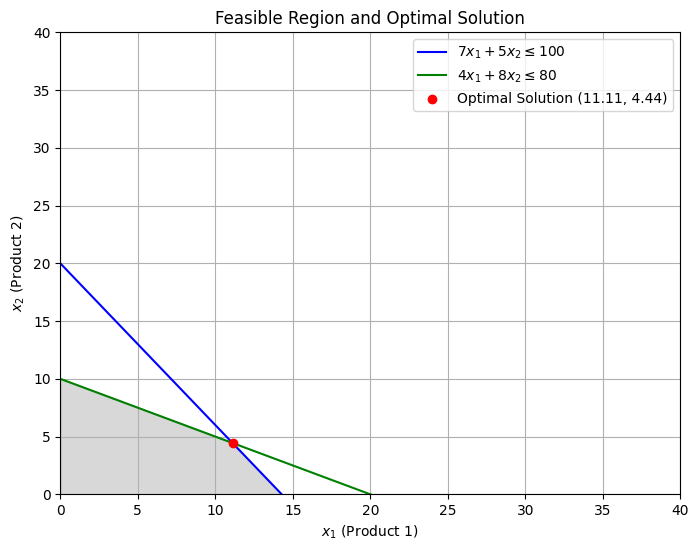

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the objective function (maximize profit → minimize negative profit)
c = [-25, -31]  # Negative for maximization

# Define the inequality constraints (Ax ≤ b)
A = [
    [7, 5],   # Material 1 constraint
    [4, 8]    # Material 2 constraint
]
b = [100, 80]

# Define bounds for x1 and x2 (Non-negativity)
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method="highs")

# Extract optimal values
x1_opt, x2_opt = result.x
optimal_profit = -result.fun  # Convert back to maximization

print(f"Optimal Production: x1 = {x1_opt:.2f}, x2 = {x2_opt:.2f}")
print(f"Maximum Profit: {optimal_profit:.2f} million yen")

# Visualization of Constraints and Feasible Region
x1 = np.linspace(0, 40, 100)  # Range for x1

# Compute x2 values based on the constraints
x2_material1 = (100 - 7*x1) / 5  # From 7x1 + 5x2 ≤ 100
x2_material2 = (80 - 4*x1) / 8   # From 4x1 + 8x2 ≤ 80

# Plot the constraint lines
plt.figure(figsize=(8, 6))
plt.plot(x1, x2_material1, label=r"$7x_1 + 5x_2 \leq 100$", color="b")
plt.plot(x1, x2_material2, label=r"$4x_1 + 8x_2 \leq 80$", color="g")

# Shade the feasible region
plt.fill_between(x1, np.minimum(x2_material1, x2_material2), 0, where=(x1 >= 0), color='gray', alpha=0.3)

# Plot optimal point
plt.scatter(x1_opt, x2_opt, color='red', zorder=3, label=f"Optimal Solution ({x1_opt:.2f}, {x2_opt:.2f})")

# Labels and legend
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel("$x_1$ (Product 1)")
plt.ylabel("$x_2$ (Product 2)")
plt.title("Feasible Region and Optimal Solution")
plt.legend()
plt.grid()
plt.show()

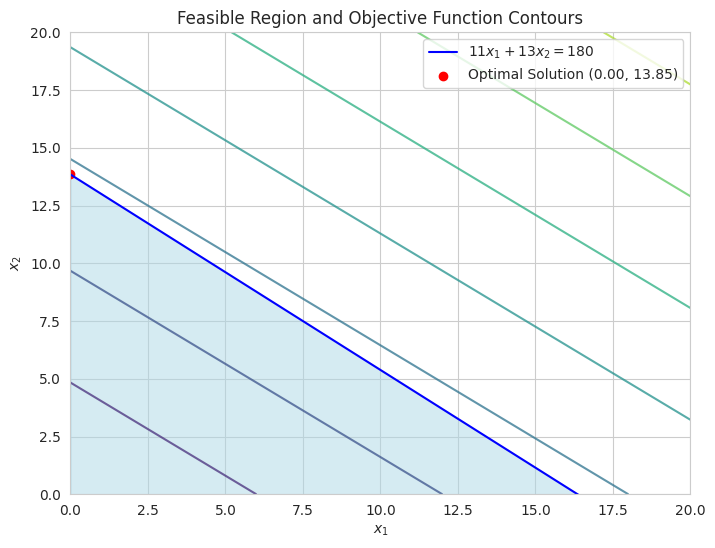

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linprog

# Define the constraint line: 11x1 + 13x2 <= 180
x1 = np.linspace(0, 20, 100)
x2 = (180 - 11*x1) / 13

# Define the objective function Z = 25x1 + 31x2 (level curves)
def objective(x1, x2):
    return 25*x1 + 31*x2

# Create grid for contour plot
X1, X2 = np.meshgrid(np.linspace(0, 20, 100), np.linspace(0, 20, 100))
Z = objective(X1, X2)

# Solve using Linear Programming to find the optimal point
c = [-25, -31]  # Maximization problem
A = [[11, 13]]
b = [180]
bounds = [(0, None), (0, None)]
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Extract optimal solution
x1_opt, x2_opt = res.x

# Plot
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.plot(x1, x2, label=r'$11x_1 + 13x_2 = 180$', color='blue')
plt.fill_between(x1, 0, np.minimum(x2, 20), color='lightblue', alpha=0.5)
plt.contour(X1, X2, Z, levels=10, cmap='viridis', alpha=0.75)
plt.scatter(x1_opt, x2_opt, color='red', marker='o', label=f'Optimal Solution ({x1_opt:.2f}, {x2_opt:.2f})')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("Feasible Region and Objective Function Contours")
plt.legend()
plt.show()
